# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [105]:
import pandas as pd 

## Read in the file `craftcans.csv`, and look at the first first rows

In [126]:
df = pd.read_csv("craftcans.csv",  na_values=None)
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


## How many rows do you have in the data? What are the column types?

In [43]:
#2416 rows, 7 columns 
df.shape

(2416, 7)

In [44]:
#every column is an object 
df.dtypes

ï»¿Beer     object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [45]:
producers = df.Brewery.value_counts(normalize=True)
producers.head(10)

Brewery Vivant                0.025726
Oskar Blues Brewery           0.019087
Sun King Brewing Company      0.015768
Cigar City Brewing Company    0.010373
Sixpoint Craft Ales           0.009959
Hopworks Urban Brewery        0.009544
Stevens Point Brewery         0.009129
Great Crescent Brewery        0.008299
21st Amendment Brewery        0.008299
Bonfire Brewing Company       0.007884
Name: Brewery, dtype: float64

## What is the most common ABV? (alcohol by volume)

In [46]:
#5 percent is the most common ABC
ABV = df.ABV.value_counts(normalize=True)
ABV.head(1)

5.00%    0.091567
Name: ABV, dtype: float64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [47]:
df.ABV
#df.ABV = df.ABV.astype(float)

df.ABV = df.ABV.str[:-1]
df.ABV = test.astype(float)


### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [48]:
df.ABV = df.ABV.str[:-1]


,ï»¿Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.5,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.9,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.0,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.0,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.3,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.0,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85


### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [ ]:
df.ABV = test.astype(float)

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [49]:
#average ABV is 6 percent 
df.ABV.mean()

5.977342419080068

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [55]:
#68 are missing 
df.ABV.isna().sum()


68

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [62]:
cities = df.Location.value_counts(normalize=True)
cities.head(10)

Grand Rapids, MI    0.027386
Chicago, IL         0.022822
Portland, OR        0.021577
Indianapolis, IN    0.017842
San Diego, CA       0.017427
Boulder, CO         0.017012
Denver, CO          0.016598
Brooklyn, NY        0.015768
Seattle, WA         0.014523
Longmont, CO        0.013693
Name: Location, dtype: float64

## List all of the beer from Brooklyn, NY

In [74]:
brooklyn = df[df.Location.str.contains("Brooklyn, NY", case=False, na=False)]
brooklyn

,ï»¿Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [75]:
#Sixpoint Craft Ales produced the most cans of beer 
brooklyn.Brewery.value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [79]:
style = brooklyn.Style.value_counts()
style.head(5)

American IPA                      6
American Double / Imperial IPA    3
American Pale Ale (APA)           3
Baltic Porter                     2
German Pilsener                   2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [86]:
NY = df[df.Location.str.contains(", NY", case=True, na=False)]
NY

,ï»¿Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [92]:
#there are 16 distinct breweries in NYS 
len(pd.unique(NY['Brewery']))

16

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [109]:
df

,ï»¿Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25
...,...,...,...,...,...,...,...
2411,Mama's Little Yella Pils,Oskar Blues Brewery,"Longmont, CO",Czech Pilsener,12 oz.,5.30%,35
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100
2413,Old Chub,Oskar Blues Brewery,"Longmont, CO",Scottish Ale,12 oz.,8.00%,35
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85


IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [116]:
df.groupby('Beer').mean('IBUs')

""
Beer
#001 Golden Amber Lager
#002 American I.P.A.
#003 Brown & Robust Porter
#004 Session I.P.A.
#9
...
Zen
Zombie Monkie
Zonker Stout


### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [131]:
import numpy as np


df.IBUs = df.IBUs.replace({
    'Does not apply': np.nan
})


df.IBUs = df.IBUs.astype(float)


In [133]:
#everage IBU = 43
df.IBUs.mean()



42.71316725978647

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot:>

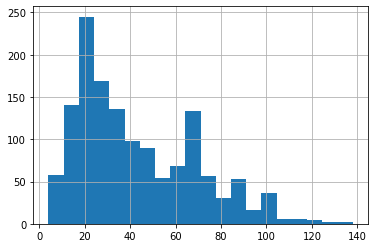

In [136]:
df.IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [139]:
df.IBUs.describe()
df[df.IBUs > 64]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00%,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50%,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60%,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00%,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.20%,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.00%,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.90%,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.90%,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.70%,85.0


## List all of the beers with IBUs below the 25th percentile

In [141]:
df.IBUs.describe()
df[df.IBUs < 21]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.00%,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.50%,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.00%,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.20%,18.0
...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.00%,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.50%,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.60%,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.10%,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

array([[<AxesSubplot:title={'center':'IBUs'}>]], dtype=object)

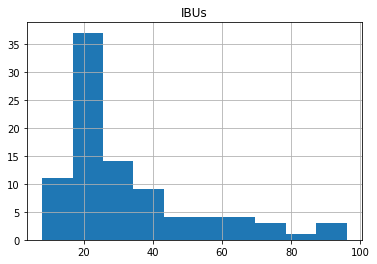

In [151]:
df.groupby('Style').median('IBUs').hist()


## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [181]:
high_IBU = df[df.IBUs > 64]
high_IBU.Style.value_counts().head(5)


American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [180]:

low_IBU = df[df.IBUs > 21]
low_IBU.Style.value_counts().head(5)

American IPA                      301
American Pale Ale (APA)           150
American Double / Imperial IPA     75
American Amber / Red Ale           62
American Porter                    33
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [194]:
wheat_beer = df[df.Style.isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])]
wheat_beer.IBUs.mean()

18.982142857142858

## Draw a histogram of the IBUs of those beers

<AxesSubplot:>

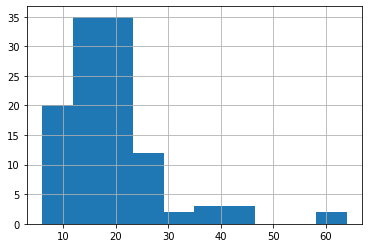

In [218]:
wheat_beer_hist = wheat_beer.IBUs.hist()
wheat_beer_hist

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [213]:
IPA = df.loc[df['Style'].str.contains("IPA", case=True, na=False)]
IPA.mean()


/var/folders/th/rs4zk3q55y3dxsm259ph3h3w0000gn/T/ipykernel_17602/2255338418.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  IPA.mean()


IBUs    71.94898
dtype: float64

array([[<AxesSubplot:title={'center':'IBUs'}>]], dtype=object)

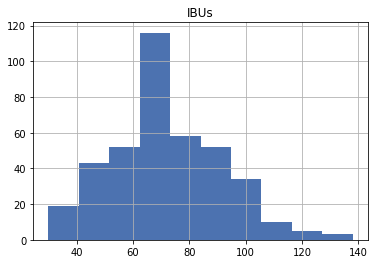

In [222]:
ax = IPA.hist()
ax

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

In [240]:
ax = IPA.plot()
df.plot(ax = ax, wheat_beer_hist) #hmm 


SyntaxError: positional argument follows keyword argument (3677337968.py, line 2)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.